In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
#Display two images
def display(a, b, title1="Original", title2="Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
#Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title (title1)
    plt.show()

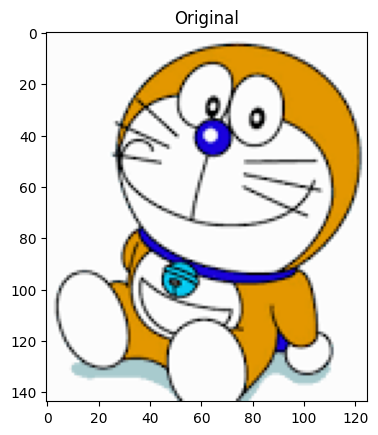

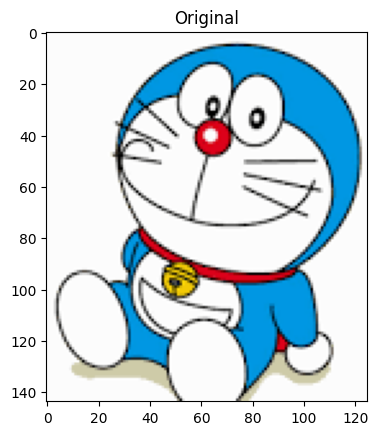

In [4]:

img2 = cv2.imread('doraemon.png')#in BGR format
original = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
display_one(img2)
display_one(original)

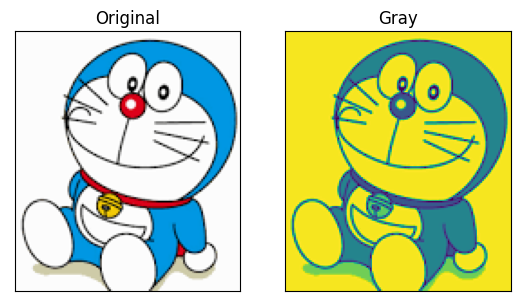

In [5]:
gray2 = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)#convert to grayscale
display(original, gray2, 'Original', 'Gray')

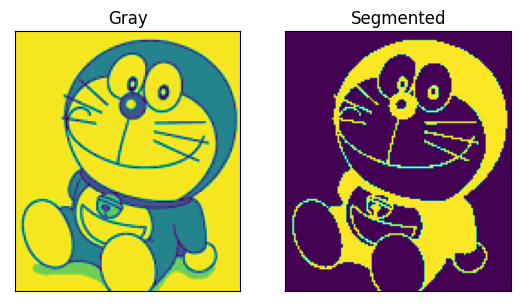

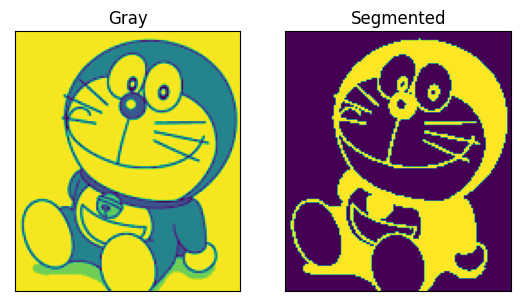

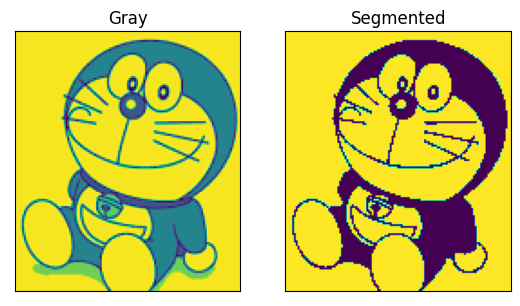

In [6]:
ret, thresh2 = cv2.threshold(gray2, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(gray2, thresh2, 'Gray', 'Segmented')

ret, thresh2 = cv2.threshold(gray2, 220, 255, cv2.THRESH_BINARY_INV)
display(gray2, thresh2, 'Gray', 'Segmented')

ret, thresh2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_OTSU)
display(gray2, thresh2, 'Gray', 'Segmented')

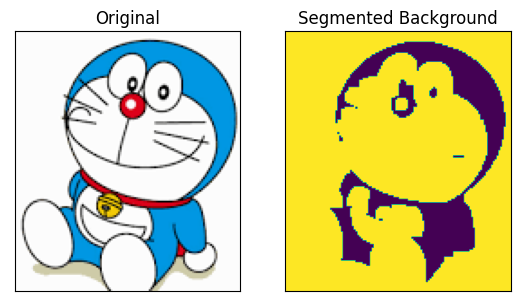

In [8]:
#Further noise removal(Morphology)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel, iterations=1)

#sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

#Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display(original, sure_bg, 'Original', 'Segmented Background')